<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я буду проверять твой проект. Если не против, то давай общаться на «ты». 

Сразу хочу обратить внимание на цветовую разметку.
Зеленым помечены отличные решения и идеи, которые можно и нужно использовать в будущем. Желтым отмечено то, что можно или нужно оптимизировать, в зависимости от контекста. Красным обозначены грубые ошибки.
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме трех перечисленных.**
Также я попрошу тебя **не менять и не передвигать мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
Кроме того, комментарии у меня обозначены как заголовки. Это сбивает содержание, но при последующей проверке я могу снять с них заголовок, если тебе так будет удобнее. При этом они удобны, поскольку ты сразу можешь перейти к ним.   
        
<hr>
    
**По проекту:** работа выполнена очень хорошо, все оформлено понятно и аккуратно. У меня остались некоторые вопросы, я все написала в комментариях. Буду ждать работу на повторное ревью.
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 2</b>
    
Оставила новые комментарии, посмотри их, пожалуйста. Если есть вопросы, задавай. Если нет, то напиши об этом в ответном комментарии, чтобы я с чистой совестью могла принять проект. Также поменяй путь к файлу. А то я запустила и все сломалось. 
</div>

<div style="border-radius: 20px; border: 5px solid black; padding: 15px;">
<h2> Доработка студента</h2>
    
1. Изменил путь к файлу.
2. Вопросов нет, все понял, спасибо! (Подчеркнул для себя новую функцию transform)
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера 3</b>
    
Рада, что смогла помочь :) Желаю тебе успехов в дальнейшем обучении :)
</div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Оглавление

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Обработка пропущенных значений](#null)
    * [Замена типа данных](#replace)
    * [Обработка дубликатов](#duplicates)    
    * [Лемматизация](#lemmatization)
    * [Категоризация](#categorization)
3. [Ответы на вопросы](#answers)
    * [Ответ на основную задачу](#main)
4. [Общий вывод](#conclusion)
5. [Чек-лист готовности проекта](#check)


# Описание данных


1. children — количество детей в семье 
2. days_employed — общий трудовой стаж в днях
3. dob_years — возраст клиента в годах
4. education — уровень образования клиента
5. education_id — идентификатор уровня образования
6. family_status — семейное положение
7. family_status_id — идентификатор семейного положения
8. gender — пол клиента
9. income_type — тип занятости
10. debt — имел ли задолженность по возврату кредитов
11. total_income — ежемесячный доход
12. purpose — цель получения кредита

## Шаг 1. Откройте файл с данными и изучите общую информацию
<a id="start"></a>

In [1]:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter

In [3]:
df = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M1/project1/data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [6]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [7]:
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [8]:
df.duplicated().sum() # сумма дублированных записей

54

In [9]:
df.isnull().sum() # сумма пропущенных записей

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [10]:
df['education'].value_counts() # уникальные записи и их количество в столбце education

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [11]:
df['income_type'].value_counts() # уникальные записи и их количество в столбце income_type

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [12]:
df['gender'].value_counts() # уникальные записи и их количество в столбце gender

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [13]:
df['family_status'].value_counts() # уникальные записи и их количество в столбце family_status

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [14]:
df['children'].value_counts() # уникальные записи и их количество в столбце children

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [15]:
df['education_id'].value_counts() # уникальные записи и их количество в столбце education_id

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [16]:
df['family_status_id'].value_counts() # уникальные записи и их количество в столбце family_status_id

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

**Вывод**

Каждая строка таблицы представляет собой информацию о клиенте (количество детей в семье, общий трудовой стаж в днях, возраст клиента в годах, уровень образования клиента, идентификатор уровня образования, семейное положение, идентификатор семейного положения, пол клиента, тип занятости, имел ли задолженность по возврату кредитов, ежемесячный доход, цель получения кредита). Нас больше всего интересуют столбцы children, family_status_id, debt  т.к. они участвуют в проверке основной гипотезы.
Ниже представлена информация о самих данных:
1. Названия стобцов в надлежащем виде
2. Проблема в значениях days_employed (общий трудовой стаж в днях) - попадаются отрицательные 
3. Проблема в значениях days_employed(общий трудовой стаж в днях) - float64, нужен int 64
4. Проблема в названиях education (уровень образования клиентах) - разная запись значений
5. Необходима лемматизация в purpose (цель получения кредита) - разные записи, а основа слова и смысл тот же
6. 54 грубо дублированных записей во всей таблице
7. 2174 пропущенных значений в стоблцах total_income (ежемесячный доход) и days_employed (общий трудовой стаж в днях)
8. Отрицательные значения в столбце children (количество детей в семье) и артефакт - 20 детей
9. Странное значение XNA в столбце gender (пол клиента)
10. Необходима классификация таблицы
11. Необходимо категоризировать данные таблицы

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Хорошо.
</div>

## Шаг 2. Предобработка данных
<a id="preprocessing"></a>

**Странное значение XNA в столбце gender (пол клиента). Продемонстриуем эту строку:**


In [17]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


**Вывод**

Восстановить пол не получится. Нужно уточнить, что значит XNA, это аббревиатура или заполнитель  пропущенных значений. Уточнил, это мусорное значение, удаляем его.

In [18]:
df = df.drop(index=[10701])

**Отрицательные значения в столбце children (количество детей в семье), 47 записей содержат значение -1.** 


Как сообщалось, -1 раньше было 1. Данная ошибка связана с человеческим фактором (вероятно, что минус в данном случает когда-то был дефисом). Введем функцию, которая переводит отрицательные значения в положительные.

In [19]:
def children_positive(children):
    if children < 0:
        return children * -1
    else:
        return children

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Можно взять модуль по столбцу:
    
    df['children'] = df['children'].abs()
</div>

In [20]:
df['children'] = df['children'].apply(children_positive)

In [21]:
df['children'].value_counts() # проверка

0     14148
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

**Вывод**

Заменили отрицательные значения положительными с помощью умножения на -1. Данная ошибка возникла из-за человеческого фактора (замены дефиса минусом).

**Проблема в названиях education (уровень образования клиентах) - разная запись значений.**

Ошибка связана с человеческим фактором. Приведем строки к одному формату.

In [22]:
df['education'] = df['education'].str.lower()

In [23]:
df['education'].value_counts() # проверка

среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

**Вывод**

Строки были приведены к единому формату, а разные записи появились из-за человеческого фактора (ошибок сотрудников, которые заполняли таблицу).

**Проверим снова на дубликаты.**

In [24]:
df.duplicated().sum()

71

Их количество увеличилось, вследствие операций выше.

### Обработка пропусков
<a id="null"></a>

Проверим, пропущено ли значение total_income в том же месте, где и days_employed.

In [25]:
df.loc[(df.loc[:, 'total_income'].isna()) & (df.loc[:, 'days_employed'].isna())].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

total_income пропущено в том же месте, где и days_employed. Посмотрим на такие строчки.

In [26]:
df.loc[(df.loc[:, 'total_income'].isna()) & (df.loc[:, 'days_employed'].isna())].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Отметим, что у клиентов в этих строчках есть дети, семейное положение, а также статус кредита, то есть они представляют ценность для исследования (и таких записей 2174 или 10% всей таблицы, это достаточно много). Пропуск скорее всего связан с технологической ошибкой, поскольку данные поля, вероятнее всего, являются обязательными при заполнении.

Начнем с total_income, выведем 5 самых богатых клиентов и 5 самых бедных клиентов.

In [27]:
df.sort_values(by='total_income', ascending=False).head(5) # 5 самых богатых клиентов

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,-1477.438114,44,высшее,0,женат / замужем,0,M,компаньон,0,2.265604e+06,ремонт жилью
19606,1,-2577.664662,39,высшее,0,женат / замужем,0,M,компаньон,1,2.200852e+06,строительство недвижимости
9169,1,-5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
20809,0,-4719.273476,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1.715018e+06,покупка жилья для семьи
17178,0,-5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1.711309e+06,сыграть свадьбу


In [28]:
df.sort_values(by='total_income', ascending=True).head(5) # 5 самых бедных клиентов

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
14585,0,359219.059341,57,среднее,1,женат / замужем,0,F,пенсионер,1,20667.263793,недвижимость
13006,0,369708.589113,37,среднее,1,гражданский брак,1,M,пенсионер,0,21205.280566,заняться высшим образованием
16174,1,-3642.820023,52,среднее,1,женат / замужем,0,M,сотрудник,0,21367.648356,приобретение автомобиля
1598,0,359726.104207,68,среднее,1,гражданский брак,1,M,пенсионер,0,21695.101789,на проведение свадьбы
14276,0,346602.453782,61,среднее,1,женат / замужем,0,F,пенсионер,0,21895.614355,недвижимость


Построим гистограмму распределения зарплат.

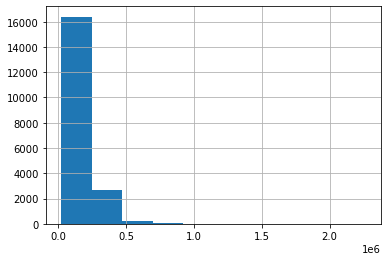

In [29]:
h = df['total_income'].hist(bins=10)
fig = h.get_figure()

Заметим, что значения на графике сильно отличаются, а пропущенные значения в столбце с зарплатой (количественная переменная), следует использовать median() для заполнения.

In [30]:
#total_income_median = df['total_income'].median()

In [31]:
#df['total_income'] = df['total_income'].fillna(total_income_median)

<div class="alert alert-warning" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
- Можно не создавать новую переменную.
- Можем ли мы заполнить медианой, но в группировке по 2-3 характеристикам клиента?
</div>

<div style="border-radius: 20px; border: 5px solid black; padding: 15px;">
<h2> Доработка студента</h2>
    
1. Убрал созданную переменную.
2. Можем ли мы заполнить медианой, но в группировке по 2-3 характеристикам клиента?
    * Да, это возможно, мы можем создать несколько категорий дохода, посчитать для них mean(), если есть пропуск заполнить им. В примере ниже я заполнил на основании income_type. Создал на основании 2 характеристик сводную таблицу (children и income_type), а также заполнил пропуски средним значением (mean) по группе.
    * Выполнил это 2 способами, один из которых закомментировал. 
      
</div>

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера 2</h2>
    
Отлично! Если характеристики всего 2, то можно так:
    
    df['total_income'] = df['total_income'].fillna(df.groupby(['income_type','childre'])['total_income'].transform('median'))
    
Я беру медиану, потому что она спасет от выбросов.    
</div>

In [144]:
p_table_income = df.pivot_table(index='income_type', columns='children', values='total_income', aggfunc=['mean'])
p_table_income

mean                                               \
children                    0              1              2              3    
income_type                                                                   
безработный      202722.511368   59956.991984            NaN            NaN   
в декрете                  NaN            NaN   53829.130729            NaN   
госслужащий      174494.315540  163909.146567  164251.805111  182127.605550   
компаньон        202507.040363  201190.650047  204877.637873  211355.953721   
пенсионер        136249.791984  144685.452808  181109.920094  158136.347842   
предприниматель  499163.144947            NaN            NaN            NaN   
сотрудник        161429.610352  161035.942521  159602.408140  173096.005872   
студент           98201.625314            NaN            NaN            NaN   

                                                              
children                    4              5              20  
income_type                                                   
безработный                NaN            NaN            NaN  
в декрете                  NaN            NaN            NaN  
госслужащий      199131.256091  126102.147792  258005.804002  
компаньон        146803.008792  186351.410251  177126.112713  
пенсионер        153263.850194            NaN  125683.912596  
предприниматель            NaN            NaN            NaN  
сотрудник        168729.403794  172927.479243  170027.148008  
студент                    NaN            NaN            NaN

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера 2</h2>
    
Тут тоже  тебя строки различаются только в цифрах. Пускаем цикл по  уникальным значениям детей и вместо цифры используем циклическую переменную. В результате будет только 2 строки кода.   
</div>

In [145]:
p_table_income['mean'][0] = p_table_income['mean'][0].fillna(p_table_income['mean'][0].mean())
p_table_income['mean'][1] = p_table_income['mean'][1].fillna(p_table_income['mean'][1].mean())
p_table_income['mean'][2] = p_table_income['mean'][2].fillna(p_table_income['mean'][2].mean())
p_table_income['mean'][3] = p_table_income['mean'][3].fillna(p_table_income['mean'][3].mean())
p_table_income['mean'][4] = p_table_income['mean'][4].fillna(p_table_income['mean'][4].mean())
p_table_income['mean'][5] = p_table_income['mean'][5].fillna(p_table_income['mean'][5].mean())
p_table_income['mean'][20] = p_table_income['mean'][20].fillna(p_table_income['mean'][20].mean())
p_table_income

mean                                               \
children                    0              1              2              3    
income_type                                                                   
безработный      202722.511368   59956.991984  152734.180389  181178.978246   
в декрете        210681.148553  146155.636786   53829.130729  181178.978246   
госслужащий      174494.315540  163909.146567  164251.805111  182127.605550   
компаньон        202507.040363  201190.650047  204877.637873  211355.953721   
пенсионер        136249.791984  144685.452808  181109.920094  158136.347842   
предприниматель  499163.144947  146155.636786  152734.180389  181178.978246   
сотрудник        161429.610352  161035.942521  159602.408140  173096.005872   
студент           98201.625314  146155.636786  152734.180389  181178.978246   

                                                              
children                    4              5              20  
income_type                                                   
безработный      166981.879718  161793.679095  182710.744330  
в декрете        166981.879718  161793.679095  182710.744330  
госслужащий      199131.256091  126102.147792  258005.804002  
компаньон        146803.008792  186351.410251  177126.112713  
пенсионер        153263.850194  161793.679095  125683.912596  
предприниматель  166981.879718  161793.679095  182710.744330  
сотрудник        168729.403794  172927.479243  170027.148008  
студент          166981.879718  161793.679095  182710.744330

In [146]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

In [147]:
df.isna().sum() # проверка

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Теперь перейдем к days_employed. days_employed тоже количественная переменная и ее также нужно заполнить, так как удаление или игнорирование повлияет на результаты нашей выборки. 

In [148]:
df.sort_values(by='days_employed', ascending=True).head(5) # ознакомимся с данными еще раз

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
4299,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
7329,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
17838,0,-16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
16825,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости


Заметили отрицательные значения, посчитаем их.

In [149]:
df.loc[df.loc[:, 'days_employed'] < 0, 'days_employed'].count() # количество отрицательных дней трудового стажа

15905

In [150]:
df.loc[df.loc[:, 'days_employed'] >= 0, 'days_employed'].count() # количество положительных дней трудового стажа

3445

Встречаются отрицательные значения, которые необходимо перевести в положительные для дальнейшей работы. Значения стали отрицательными, как сообщилось из-за человеческого фактора (ошибка при вводе, некорректная формула). Введем функцию, которая переводит отрицательные значения в положительные.

In [151]:
def days_employed_positive(days_employed):
    if days_employed < 0:
        return days_employed * -1
    else:
        return days_employed

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Тут тоже модуль можно взять.
</div>

In [152]:
df['days_employed'] = df['days_employed'].apply(days_employed_positive)

In [153]:
df.loc[df.loc[:, 'days_employed'] < 0, 'days_employed'].count() # проверка

0

In [154]:
df.sort_values(by='days_employed', ascending=False).head(5) # 5 клиентов с самым большим трудовым стажем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба


In [155]:
df.sort_values(by='days_employed', ascending=True).head(5) # 5 клиентов с самым маленьким трудовым стажем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
17437,1,24.141633,31,среднее,1,женат / замужем,0,F,сотрудник,1,166952.415427,высшее образование
8336,0,24.240695,32,высшее,0,Не женат / не замужем,4,M,сотрудник,0,124115.373655,получение дополнительного образования
6157,2,30.195337,47,среднее,1,гражданский брак,1,M,компаньон,0,231461.185606,свадьба
9683,0,33.520665,43,среднее,1,Не женат / не замужем,4,M,сотрудник,1,128555.897209,приобретение автомобиля
2127,1,34.701045,31,высшее,0,женат / замужем,0,F,компаньон,0,90557.994311,получение образования


Построим гистограмму распределения дней трудового стажа.

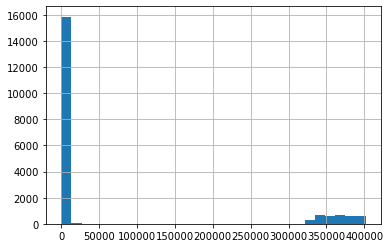

In [156]:
h = df['days_employed'].hist(bins=30)
fig = h.get_figure()

Заметим, что значения также сильно отличаются, следовательно, заменим медианой.

In [157]:
days_employed_median = df['days_employed'].median()

In [158]:
df['days_employed'] = df['days_employed'].fillna(days_employed_median)

<div class="alert alert-warning" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Здесь тот же комментарий, что и с доходом.
</div>

<div style="border-radius: 20px; border: 5px solid black; padding: 15px;">
<h2> Доработка студента</h2>
    
1. Убрал созданную переменную.
  
</div>

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера 2</h2>
    
Хорошо. Хотя стаж также можно заполнить группировкой.
</div>

In [159]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

In [160]:
df.isna().sum() # проверка

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

1. Были обнаружены пропуски в total_income и days_employed
2. total_income пропущено в том же месте, где и days_employed
3. Значения в столбце total_income пропущены из-за технологической ошибкой (при копировании), также как и в в столбце days_employed
4. Значения в столбце days_employed были отрицательными из-за человеческой ошибки (ошибка при ввводе, некорректная формула)
5. Пропуски в столбце total_income были заполнены на основании медианы, т.к зарплаты сильно разнятся (видно на графике) 
6. Пропуски в столбце days_employed были заполнены на основании медианы, т.к трудовой стаж сильно разнится (видно на графике) 

### Замена типа данных
<a id="replace"></a>

Проблема в значениях days_employed(общий трудовой стаж в днях) - float64, нужен int 64


In [161]:
df['days_employed'] = df['days_employed'].astype('int64')

In [162]:
df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  int64  
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


**Вывод**

Была обнаружена проблема в значениях days_employed(общий трудовой стаж в днях), использовался тип данных float64, а требуется int64, поскольку общий трудовой стаж в днях вещественным быть не может. При замене использовался метод astype(), т.к. необходимо добиться целочисленного значения, следовательно, to_numeric использовать нельзя. 

### Обработка дубликатов
<a id="duplicates"></a>

71 грубо дублированных записей во всей таблице были выявлены выше. Проверим не изменилось ли их количество:


In [163]:
df.duplicated().sum()

71

In [164]:
df = df.drop_duplicates().reset_index(drop=True)

In [165]:
df.duplicated().sum() # проверка

0

**Вывод**

Удаление грубо дублированных записей позволит провести анализ точнее. Использовался метод drop_duplicates(), а также reset_index(drop=True) для изменения индексов и удаления старых. Полагаю, что дублированные записи возникли из-за человеческого фактора, вследствие большого количества клиентов и, вероятнее всего, отсутсвие 'регламента' заполнения.

### Лемматизация
<a id="lemmatization"></a>

Как отмечалось выше, необходимо провести лемматизацию в столбце purpose. Продемонстрируем этот столбец.

In [166]:
df['purpose'].head(10)

0                 покупка жилья
1       приобретение автомобиля
2                 покупка жилья
3    дополнительное образование
4               сыграть свадьбу
5                 покупка жилья
6             операции с жильем
7                   образование
8         на проведение свадьбы
9       покупка жилья для семьи
Name: purpose, dtype: object

In [167]:
m = Mystem()

In [168]:
unique_purpose_lst = df['purpose'].unique() # получаем список уникальных значений столбца purpose
lemmas = []

In [169]:
for el in unique_purpose_lst: # добавляем лемматизированные строки в список lemmas для дальнейшего частотного подсчета
    try:
        lemma = " ".join(m.lemmatize(el.strip()))
        lemmas.append(lemma)
    except:
        print('Incorrect data')

In [170]:
Counter(lemmas)

Counter({'покупка   жилье \n': 1,
         'приобретение   автомобиль \n': 1,
         'дополнительный   образование \n': 1,
         'сыграть   свадьба \n': 1,
         'операция   с   жилье \n': 1,
         'образование \n': 1,
         'на   проведение   свадьба \n': 1,
         'покупка   жилье   для   семья \n': 1,
         'покупка   недвижимость \n': 1,
         'покупка   коммерческий   недвижимость \n': 1,
         'покупка   жилой   недвижимость \n': 1,
         'строительство   собственный   недвижимость \n': 1,
         'недвижимость \n': 1,
         'строительство   недвижимость \n': 1,
         'на   покупка   подержать   автомобиль \n': 1,
         'на   покупка   свой   автомобиль \n': 1,
         'операция   с   коммерческий   недвижимость \n': 1,
         'строительство   жилой   недвижимость \n': 1,
         'жилье \n': 1,
         'операция   со   свой   недвижимость \n': 1,
         'автомобиль \n': 2,
         'заниматься   образование \n': 1,
         'сделка   с

Визуально выделяем 3-6 основных целей кредита по частоте. Это жилье/недвижимость, автомобиль, образование, свадьба.

Описание процесса лемматизации:
1. Лемматизируем поступившую цель клиента
2. Проверяем входит ли лемма в основные цели кредита
3. Возвращаем основную цель

In [171]:
def lemmatize(purpose): 
    try:
        purpose_lemma = m.lemmatize(purpose) 
    except:
        print('Incorrect data')
    if ('жилье'in purpose_lemma) or ('недвижимость' in purpose_lemma):
        return 'жилье/недвижимость'
    elif 'автомобиль' in purpose_lemma:
        return 'автомобиль'
    elif 'образование' in purpose_lemma:
        return 'образование'
    elif 'свадьба' in purpose_lemma:
        return 'свадьба'
    else:
        return 'другое'

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Согласна.
</div>

In [172]:
df['purpose'] = df['purpose'].apply(lemmatize)

In [173]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,жилье/недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,жилье/недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,свадьба


**Вывод**

Были лемматизированы значения в столбце purpose, с помощью выделения основных целей кредита (жилье/недвижимость, автомобиль, образование, свадьба) и подсчета частоты их появления. 

### Категоризация данных
<a id="categorization"></a>

Уточним сколько раз встречается каждый education и family_status

In [174]:
df['education'].value_counts()

среднее                15172
высшее                  5250
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

In [175]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4150
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Данные избыточны и повторяются многократно, нужно классифицировать таблицу, разделить ее на 2 части. Первая будет включать в себя столбцы children, days_employed, education_id, family_status_id, gender, income_type, debt, total_income, purpose. А вторая будет состоять из 2 словарей, один - education_id, education, второй - family_status_id, family_status. Были выбраны следующие столбцы, т.к. они содержат только айди и описание этого айди. 

<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Да, это те самые словари, о которых нас спрашивают.
</div>

In [176]:
df_log = df[['children', 'days_employed', 'education_id','family_status_id', # первая часть
             'gender', 'income_type', 'debt', 'total_income', 'purpose']] 

In [177]:
df_dict1 = df[['education_id', 'education']] # вторая часть первый словарь 
df_dict2 = df[['family_status_id', 'family_status']] # вторая часть второй словарь 

In [178]:
df_dict1 = df_dict1.drop_duplicates().reset_index(drop=True)
df_dict2 = df_dict2.drop_duplicates().reset_index(drop=True)

In [179]:
df_log.head(5)

,children,days_employed,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,0,0,F,сотрудник,0,253875.639453,жилье/недвижимость
1,1,4024,1,0,F,сотрудник,0,112080.014102,автомобиль
2,0,5623,1,0,M,сотрудник,0,145885.952297,жилье/недвижимость
3,3,4124,1,0,M,сотрудник,0,267628.550329,образование
4,0,340266,1,1,F,пенсионер,0,158616.077870,свадьба


In [180]:
df_dict1

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [181]:
df_dict2

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


**Вывод**

Таблица была разделена на 2 части (были выбраны следующие столбцы, т.к. они содержат только айди и описание этого айди): 
1. Первая часть включает в себя столбцы children, days_employed, education_id, family_status_id, gender, income_type, debt, total_income, purpose. 
2. Вторая часть состоит из 2 словарей:
    1. Включает в себя столбцы education_id, education.
    2. Включает в себя столбцы family_status_id, family_status.

## Шаг 3. Ответьте на вопросы
<a id="answers"></a>

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

0 - нет задолжности; 1 - есть задолжность.

Узнаем количество клиентов у которых есть дети и нет задолжности:

In [182]:
df_log.loc[(df_log.loc[:, 'children'] > 0) & (df_log.loc[:, 'debt'] == 0), 'children'].count()

6685

Узнаем количество клиентов у которых есть дети и есть задолжность:

In [183]:
df_log.loc[(df_log.loc[:, 'children'] > 0) & (df_log.loc[:, 'debt'] == 1), 'children'].count()

678

In [184]:
d1 = 6685 / (678 + 6685)
print('Доля людей, у которых есть дети и нет задолжности по кредиту {:.2%}'.format(d1))

Доля людей, у которых есть дети и нет задолжности по кредиту 90.79%


Узнаем количество клиентов у которых нет детей и есть задолжность:

In [185]:
df_log.loc[(df_log.loc[:, 'children'] == 0) & (df_log.loc[:, 'debt'] == 1), 'debt'].count()

1063

Узнаем количество клиентов у которых нет детей и нет задолжности:

In [186]:
df_log.loc[(df_log.loc[:, 'children'] == 0) & (df_log.loc[:, 'debt'] == 0), 'debt'].count()

13027

In [187]:
d2 = 13027 / (1063 + 13027)
print('Доля людей, у которых нет детей и нет задолжности по кредиту {:.2%}'.format(d2))

Доля людей, у которых нет детей и нет задолжности по кредиту 92.46%


Посчитаем разницу:

In [188]:
dif = d2 - d1
print('{:.2%}'.format(dif))

1.66%


<div class="alert alert-warning" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Вот так еще проще:
</div>

In [189]:
# КОД РЕВЬЮЕРА
df.groupby('children').agg({'debt':['count', 'sum', lambda x: x.mean()*100]})

debt                 
          count   sum <lambda_0>
children                        
0         14090  1063   7.544358
1          4855   445   9.165808
2          2052   194   9.454191
3           330    27   8.181818
4            41     4   9.756098
5             9     0   0.000000
20           76     8  10.526316

<div style="border-radius: 20px; border: 5px solid black; padding: 15px;">
<h2> Доработка студента</h2>
    
1. Изменил код, согласно Вашему комментарию 
</div>

In [190]:
df.groupby('children').agg({'debt':['count', 'sum', lambda x: 100 - x.mean()*100]})

debt                  
          count   sum  <lambda_0>
children                         
0         14090  1063   92.455642
1          4855   445   90.834192
2          2052   194   90.545809
3           330    27   91.818182
4            41     4   90.243902
5             9     0  100.000000
20           76     8   89.473684

**Вывод**

Заметим, что доля людей, у которых есть дети и нет задолжности по кредиту составляет 90.79%, а для людей, у которых нет детей и нет задолжности по кредиту 92.46%. Отличаются они в 1.66%, то есть на такой небольшой процент должников по кредиту среди людей, у которых есть дети и нет задолжности больше.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Посчитаем количество записей и сумму значений (у нас их два 0 и 1) c помощью сводной таблицы:

In [191]:
df_log_pivot = df_log.pivot_table(index='family_status_id', values='debt', aggfunc=['sum', 'count'])

In [192]:
df_log_pivot # появился мультииндекс

,sum,count
,debt,debt
family_status_id,,
0,931,12339
1,388,4150
2,63,959
3,85,1195
4,274,2810


Посчитаем долю должников ко всем заемщикам.

In [193]:
df_log_pivot['proportion'] = 100 - round(df_log_pivot['sum']['debt'] / df_log_pivot['count']['debt'] * 100, 2)

In [194]:
df_log_pivot.merge(df_dict2, on='family_status_id', how='right') # произвели слияние таблиц для наглядности

/Users/nikitagudilin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,family_status_id,"(sum, debt)","(count, debt)","(proportion, )",family_status
0,0,931,12339,92.45,женат / замужем
1,1,388,4150,90.65,гражданский брак
2,2,63,959,93.43,вдовец / вдова
3,3,85,1195,92.89,в разводе
4,4,274,2810,90.25,Не женат / не замужем


Появился Warning, т.к. у нас происходит слияние при мультииндексировании - результат такой работы может быть не таким как ожидалось.

**Вывод**

По результатам таблицы можно сделать вывод, что хуже всех в срок отдают кредиты не женатые/не замужние люди и люди, проживающие в гражданском браке. А лучше всего вдовцы/вдовы, людви в разводе а также женатые/замужние.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Категоризируем данные по уровню дохода - низкий, средний и высокий:

In [195]:
def cat_total_income(total_income):
        if (total_income >= 500000):
            return 'высокий'
        elif (total_income > 100000) and (total_income < 500000):
            return 'средний'
        elif (total_income <= 100000):
            return 'низкий'

<div class="alert alert-warning" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Низкий :) Ну давай уж добавим ниже среднего и выше среднего :) А то нормальный такой низкий получился :)
</div>

<div style="border-radius: 20px; border: 5px solid black; padding: 15px;">
<h2> Доработка студента</h2>
    
1. Добавил доходы выше и ниже среднего
2. Изменил распределение по категориям
3. Изменил выводы ниже
</div>

In [196]:
def cat_total_income(total_income):
        if (total_income >= 500000):
            return 'высокий'
        elif (total_income >= 200000) and (total_income < 500000):
            return 'выше среднего'
        elif (total_income > 100000) and (total_income < 200000):
            return 'ниже среднего'
        elif (total_income <= 100000):
            return 'низкий'

Применим функцию к столбцу и посчитаем уникальные значения:

In [197]:
df_log['cat_total_income'] = df_log['total_income'].apply(cat_total_income)

<ipython-input-197-5bf0b123987c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log['cat_total_income'] = df_log['total_income'].apply(cat_total_income)


Появился Warning, т.к. Pandas запоминает источник данных для каждого фрейма (‘родительский’ фрейм). Если такой источник существует, т.е. фрейм является подмножеством данных родительского фрейма, то в момент модификации выдается warning.

In [198]:
df_log_group = df_log.groupby('cat_total_income').agg({'debt':['sum','count']}) # сгруппируем данные
df_log_group['proportion'] = 100 - round(df_log_group['debt']['sum'] / df_log_group['debt']['count'] * 100, 2)

In [199]:
df_log_group

debt        proportion
                   sum  count           
cat_total_income                        
высокий             14    222      93.69
выше среднего      344   4843      92.90
ниже среднего     1029  11925      91.37
низкий             354   4463      92.07

**Вывод**

Исходя из этой таблицы, люди с высоким уровнем и уровнем выше среднего дохода чаще всего отдают кредиты вовремя, а с уровнями низкий и ниже среднего реже всего. 

- Как разные цели кредита влияют на его возврат в срок?

Снова сгруппируем данные:

In [200]:
df_log_group = df_log.groupby('purpose').agg({'debt':['sum','count']}) # сгруппируем данные
df_log_group['proportion'] = 100 - round(df_log_group['debt']['sum'] / df_log_group['debt']['count'] * 100, 2)

In [201]:
df_log_group

debt        proportion
                    sum  count           
purpose                                  
автомобиль          403   4306      90.64
жилье/недвижимость  782  10810      92.77
образование         370   4013      90.78
свадьба             186   2324      92.00

**Вывод**

Исходя из этой таблицы, кредиты связанные со свадьбой и жильем/недвижимостью отдаются вовремя чаще, чем связанные с образованием и автомобилем.

# **3.1 Влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.**
<a id="main"></a>

Для лучшей демонстрации результатов, сгруппируем данные для ответа на основную задачу:

In [202]:
pivot_table = df_log.pivot_table(index='children', columns='family_status_id', values='debt', aggfunc=['sum', 'count'])
pivot_table

sum                             count                 \
family_status_id      0      1     2     3      4       0       1      2   
children                                                                   
0                 516.0  229.0  53.0  55.0  210.0  7468.0  2729.0  847.0   
1                 247.0  118.0   7.0  21.0   52.0  3004.0  1000.0   81.0   
2                 145.0   30.0   3.0   7.0    9.0  1533.0   343.0   20.0   
3                  17.0    8.0   0.0   1.0    1.0   249.0    56.0    6.0   
4                   3.0    0.0   0.0   0.0    1.0    29.0     8.0    1.0   
5                   0.0    0.0   NaN   NaN    NaN     7.0     2.0    NaN   
20                  3.0    3.0   0.0   1.0    1.0    49.0    12.0    4.0   

                                 
family_status_id      3       4  
children                         
0                 784.0  2262.0  
1                 316.0   454.0  
2                  81.0    75.0  
3                  11.0     8.0  
4                   1.0     2.0  
5                   NaN     NaN  
20                  2.0     9.0

In [203]:
pivot_table['proportion0'] = 100 - round(pivot_table[('sum', 0)] / pivot_table[('count', 0)] * 100, 2)
pivot_table['proportion1'] = 100 - round(pivot_table[('sum', 1)] / pivot_table[('count', 1)] * 100, 2)
pivot_table['proportion2'] = 100 - round(pivot_table[('sum', 2)] / pivot_table[('count', 2)] * 100, 2)
pivot_table['proportion3'] = 100 - round(pivot_table[('sum', 3)] / pivot_table[('count', 3)] * 100, 2)
pivot_table['proportion4'] = 100 - round(pivot_table[('sum', 4)] / pivot_table[('count', 4)] * 100, 2)

In [204]:
pivot_table = pivot_table[['proportion0', 'proportion1', 
                           'proportion2', 'proportion3', 'proportion4']].fillna('нет данных')

In [205]:
pivot_table.set_axis(['женат/замужем', 'гражданский брак', 'вдовец/вдова', 'в разводе', 'Не женат/не замужем'], axis='columns', inplace=True)
pivot_table

,женат/замужем,гражданский брак,вдовец/вдова,в разводе,Не женат/не замужем
children,,,,,
0,93.09,91.61,93.74,92.98,90.72
1,91.78,88.20,91.36,93.35,88.55
2,90.54,91.25,85,91.36,88
3,93.17,85.71,100,90.91,87.5
4,89.66,100.00,100,100,50
5,100.00,100.00,нет данных,нет данных,нет данных
20,93.88,75.00,100,50,88.89


1. Абсолютно вовремя отдают кредит женатые/замужние и люди в гражданском браке с 5 детьми, люди в гражданском браке с 4 детьми, вдовы/вдовцы с 3, 4 и 20 детьми, а также в разводе с 4 детьми
2. Нет данных о вдовах/вдовцах, в разводе и не женатых/не замужних с 5 детьми
3. Хуже всех вовремя отдают люди в разводе и в гражданском браке с 20 детьми, не женатые/не замужение с 4 детьми, а также вдовы/вдовцы с 2 детьми 

## Шаг 4. Общий вывод
<a id="conclusion"></a>

**В результате это работы были предобработаны данные:**
1. Заменены отрицательные значения в столбцах days_employed и children на положительные
2. Произведена замена типа данных в столбце days_employed с float64 на int 64
3. Значения в столбце education приведены к одной форме - нижнему регистру
4. Проведена лемматизация в столбце purpose, были выделены основные цели кредита
5. Были удалены грубо дублированные записи во всей таблице
6. 2174 пропущенных значений в стоблцах total_income и days_employed были заполнены медианой
7. Мусорное значение XNA в столбце gender было удалено
8. Таблица была классификацированна, были выделены словари.
9. Произведена категоризация по доходам на низкие, средние, высокие

**Получены ответы на рабочие гипотезы:**
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
    1. Доля людей, у которых есть дети и нет задолжности по кредиту составляет 90.79%, а для людей, у которых нет детей и нет задолжности по кредиту 92.46%. Отличаются они в 1.66%, то есть на такой небольшой процент должников по кредиту среди людей, у которых есть дети и нет задолжности больше.
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
    1. Хуже всех в срок отдают кредиты не женатые/не замужние люди и люди, проживающие в гражданском браке. А лучше всего вдовцы/вдовы, людви в разводе а также женатые/замужние.
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    1. Люди с высоким уровнем и уровнем выше среднего дохода чаще всего отдают кредиты вовремя, а с уровнями низкий и ниже среднего реже всего. 
4. Как разные цели кредита влияют на его возврат в срок?
    1. Кредиты связанные со свадьбой и жильем/недвижимостью отдаются вовремя чаще, чем связанные с образованием и автомобилем.

**Получен ответ на основную задачу:**
1. Абсолютно вовремя отдают кредит женатые/замужние и люди в гражданском браке с 5 детьми, люди в гражданском браке с 4 детьми, вдовы/вдовцы с 3, 4 и 20 детьми, а также в разводе с 4 детьми
2. Нет данных о вдовах/вдовцах, в разводе и не женатых/не замужних с 5 детьми
3. Хуже всех вовремя отдают люди в разводе и в гражданском браке с 20 детьми, не женатые/не замужение с 4 детьми, а также вдовы/вдовцы с 2 детьми.


<div class="alert alert-success" style="border-radius: 15px">
<h2> Комментарий ревьюера</h2>
    
Отличный вывод! 
</div>

## Чек-лист готовности проекта
<a id="check"></a>
Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.